In [1]:
%matplotlib inline
import numpy as np
import kwant
import mpld3
from matplotlib import pyplot as plt

In [22]:
def make_system(t=1.0, dis=0.3, E0=complex(0,-0.00029)*0.001, E0L=0., salt='abc', W=200, L=500):
    # Makes a 2d wire with a disordered segment.
    lat = kwant.lattice.square(1)
    sys = kwant.Builder()
    
    #### Define the scattering region. ####
    onsite = lambda site: E0 + dis * (2 * kwant.digest.uniform(repr(site), salt) - 1)
    rectangle = lambda pos: 0 <= pos[0] < L and 0 <= pos[1] < W
    sys[lat.shape(rectangle, (0, 0))] = onsite
    sys[lat.neighbors()] = t


    #### Define and attach the leads. ####
    # Construct the left lead.
    lead = kwant.Builder(kwant.TranslationalSymmetry((-1, 0)))
    lead[(lat(0, j) for j in xrange(W))] = E0L
    lead[lat.neighbors()] = t

    # Attach the left lead and its reversed copy.
    sys.attach_lead(lead)
    sys.attach_lead(lead.reversed())

    return sys

In [24]:
# Compute the scattering matrix
wire = sys.finalized()
s = kwant.smatrix(wire, energy = 0.38, check_hermiticity=False)

In [67]:
N = 100
ts = []
rs = []
for n in xrange(N):
    print n
    fsys = make_system(salt = str(n)).finalized()
    s = kwant.smatrix(fsys, energy = 0.38, check_hermiticity=False)
    ts += list(np.linalg.svd(s.submatrix(1,0), compute_uv=False))
    rs += list(np.linalg.svd(s.submatrix(0,0), compute_uv=False))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [118]:
t_eigs = np.array(ts)**2
r_eigs = np.array(rs)**2

Histogram of transmission eigenvalues

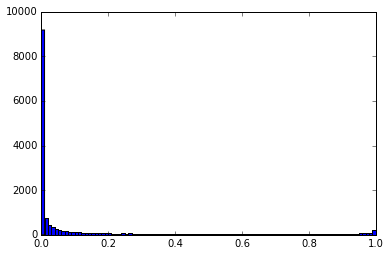

In [147]:
hist_t = plt.hist(t_eigs, bins=100)

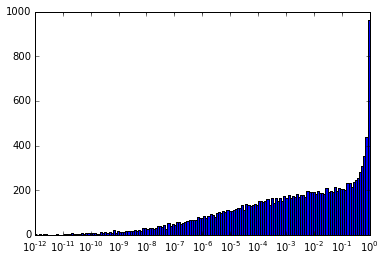

In [104]:
plt.hist(t_eigs, bins=np.logspace(-12., 0., 160))
plt.xscale('log')

Histogram of $1-r$

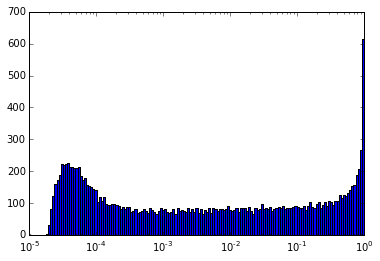

In [157]:
hist_r = plt.hist(1-r_eigs, bins=np.logspace(-5, 0., 160))
plt.xscale('log')

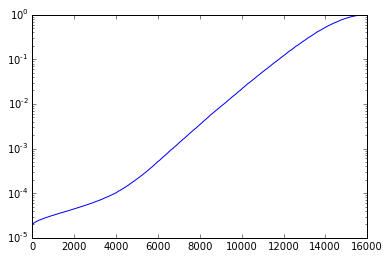

In [159]:
#plt.plot(ts, '.')
mpld3.enable_notebook()
plt.plot(1-np.sort(r_eigs)[::-1])
plt.yscale('log')